# 트리구조

## 1. 트리

부모와 자식 구조로 이어진 자료구조

* 자식을 최대 하나까지만 허용한 경우 -> 한 방향 연결 리스트
* 자식을 두 개까지만 허용한 경우 -> 이진 트리 Binary Tree

`-` **용어 정리**

* 맨 위에 있는 노드 : root node
* 중간 노드 : node
* 노드 간 링크 : link, edge
* 자식이 없는 노드 : leaf node
* 루트 노드로부터의 거리 : level, depth
* 노드에서 노드 간 경로 : path (출발 노드 3 -> 2 -> 7 -> 8 -> 도착 노드 12) 경유 노드를 거침 -> 경로 길이 path length == 4 (링크의 개수)
* 특정 노드 기준으로 위와 아래에 있는 노드 : 부모노드 / 자식노드
* 레벨이 같은 노드들 : 형제 노드

### 트리의 표현 방식

`-` 1. 리스트 사용 : `level 0 -> level 1 -> level 2 -> ...`

```Python
A = [a, b, c, None, d, e, f] ## level 2의 왼쪽 첫 번째 노드가 빔

B = [a, b, c, None, d, e, f, None, None, g, h, i] ## 노드가 많이 빔
```

> 각 레벨마다 꽉 차있다고 생각하고 순서대로 채움

`-` 2. 재귀적으로 리스트 사용

```Python
A = [a, [b, [], [d, [], []]], [c, [e, [], []], [f, [], []]]] ## [x, [], []]는 리프 노드
```

`-` 3. 노드 자체를 클래스로 정의

```Python
class Node :
    def __init__(self, key) :
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
```

## 2. 힙 Heap

heap property를 만족하는 이진 트리

`-` 표현법 1 : `H = [a, b, c, None, d, e, f]`

> * `H[0]`의 왼쪽 자식 노드 : `H[1]`/`H[0]`의 오른쪽 자식 노드 : `H[2]`
>
> * `H[2]`의 왼쪽 자식 노드 : `H[2*2 + 1] == H[5]` / 오른쪽 자식 노드 : `H[2*2 + 2] == H[6]`
>
> * `H[k]`의 왼쪽 : `H[k*2 + 1]` / 오른쪽 : `H[k*2 + 2]`
>
> * `H[k]`의 부모 노드 : `H[(k-1)//2]`
>
> 즉, 상수 시간의 연산으로 자식과 부모 노드를 알 수 있음


> **단점**
>
> * 레벨이 높을수록 `None`값을 많이 할당해야 됨 -> 메모리의 낭비
> * 마지막 레벨을 제외하고 꽉꽉 채워넣으면 메모리 낭비를 줄일 수 있을 텐데... -> Heap

`-` Heap Property

* 모든 부모노드의 key 값은 자식 노드의 key 값보다 작지 않다.
* 모양 성질 : 마지막 레벨이 아니면 꽉 채워져 있고, 마지막 레벨은 왼쪽부터 채워진다.

```Python
A = [2, 8, 6, 1, 10, 15, 3, 12, 11] ## -> 부모 노드의 값이 자식 노드보다 작음. 루트 노드부터 그럼

A = [15, 12, 6, 11, 10, 2, 3, 1, 5] ## 모든 노드가 만족, Heap임
```

> **힙의 특징**
>
> * 루트 노드에는 가장 큰 값이 들어있음 : `A[0]`

### 힙 제공 연산

`-` `make_heap`

* `heapify_down` 연산을 반복해야 함

> 리프 노드를 제외하고 우측 최하위 노드 기준으로 부분 힙을 구성하는 과정을 반복

```{raw}
algorithm heapify_down(k, n) :
    ## root node를 leaf node까지 내리는 데에 logN 필요
    while A[k] != leaf node :
        L, R = (2*k + 1, 2*k + 2)
        m = max_index(A[k], A[L], A[R])

        if k != m :
            ## 순서 바꿔줌
            Ak = A[k]
            A[k] = A[m]
            A[m] = Ak

            k = m
        else :
            break ## 내려갈 필요가 없음 -> 이미 힙임

algorithm make_heap(A) :
    ## O(N) * O(logN) -> O(N logN)인데, 사실 O(N)임
    n = len(A)

    for k in range(n-1, -1, -1) :
        heapify_down(k, n) ## A[k], heap 원소 갯수
```

$$\begin{align}S & = \sum_{i=0}^{h}2^i(h-i) \\
& = h\times 2^0 + (h-1)\times 2^1 + \cdots + 2\times 2^{h-2} + 1\times 2^{h-1} \\
& = 2^{h-1} + 2\times 2^{h-2} + \cdots + (h-1) \times 2 + h \\ \\

\frac12 S & = ~~~~~~~~~~~~~~~~~~~ 2^{h-2} + \cdots + (h-2) \times 2 + (h-1) + \frac{h}{2} \\ \\
\Rightarrow S - \frac12 S & = 2^{h-1} + 2^{h-2} + \cdots + 2 + 1 + \frac{h}{2} \\
& = \sum_{i=0}^{h-1} 2^i - \frac{h}{2} = \frac{2^{h-1} - 1}{2-1} - \frac12 \log_2{n} \\
& = 2^{\log_2{n} - 1} - \frac12 \log_2{n} \\
& = \frac12 n - \frac12 \log_2{n} \\

\Rightarrow & \text{w.c time complexity} = O(n)
\end{align}$$

`-` `insert`

```Python
A = [15, 12, 6, 11, 10, 2, 3, 1, 8] ## Heap임

A.insert(14) ## Heap의 모양 성질을 만족하면서 들어오게 되면(맨 마지막 오른쪽 끝에 들어옴) 힙이 깨짐 -> make_heap을 해주면 됨
```

```{raw}
algorithm insert(key) :
    A.append(key)
    idx = len(A)
    A.heapify_up(idx) ## A[k]를 root 방향으로 이동하면서 heapify : O(logN)

algorithm heapify_up(k) :
    ## leaf node를 맨 위로 올리는 경우가 있으므로 O(logN)
    while k > 0 and A[(k-1)//2] < A[k] :
        Ak = A[k]
        A[k] = A[(k-1)//2]
        A[(k-1)//2] = Ak

        k = (k-1)//2
```

> `A`를 힙으로 만들려면 `insert`를 n번 반복해도 됨(O(NlogN). 물론 make_heap이 더 빠름)

`-` `find_max`

* 전체 값 중 가장 큰 값이 힙의 루트 노드에 저장되어 있으므로 1회 연산하며, $O(1)$

```{raw}
algorithm find_max(A) :
    return A[0]
```

`-` `delete_max`

* 만약 root node가 없어지면, 아래에 있는 애들을 다 갈아엎어야 함. 일단 최소 $O(n)$
* 가장 마지막에 들어있는 leaf node 값을 root node로 옮기고, `heapify_down`을 해줘야 함 -> $O(logN)$

```{raw}
algorithm heapify_down() :
    ## 똑같이 O(logN)
    while k <= (len(A)-1) :
        if A[2*k + 1] > A[2*k + 2] :
            if A[k] < A[2*k + 1] :
                Ak = A[k]
                A[k] = A[2*k + 1]
                A[2*k + 1] = Ak
            else :
                break
        else :
            if A[k] < A[2*k + 2] :
                Ak = A[k]
                A[k] = A[2*k + 2]
                A[2*k + 2] = Ak
            else :
                break


algorithm delete_max() :
    if len(A) == 0 :
        return None

    A[0] = A[len(A)-1]
    del A[len(A)-1] ## A.pop()

    A.heapify_down(0, n) ## O(logN)
```

> 단, 힙에서는 `search` 함수를 지원하지 않음 -> 어떤 노드로 갈지 모름 : 그냥 전역 탐색하는 게 제일 빠름 $O(n)$
>
> 지금까지는 Max-Heap이고, 반대로 하면 Min-Heap도 만들 수 있음


`-` 힙을 이용해 정렬도 가능 : Heap Sort

```Python
A.make_heap() ## O(nlogn)
sorted_A = [0]*n

for k in range(n) :
    sorted_A[k] = A.delete_max()
```

`-` 구현

In [ ]:
class Heap :
    def __init__(self, A) :
        self.A = A
        self.depth = len(A)
    
    def __len__(self) :
        return len(self.A)
    
    def __repr__(self) :
        return self.A.__repr__()
    
    def heapify_down(self, k) :
        while 2*k+1 <= len(self.A)-1 :
            L, R = (2*k + 1, 2*k + 2)
            
            if 2*k+2 > len(self.A)-1 :
                R = L

            m = [k, L, R][[self.A[k], self.A[L], self.A[R]].index(max([self.A[k], self.A[L], self.A[R]]))]
            
            if k != m :
                Ak = self.A[k]
                self.A[k] = self.A[m]
                self.A[m] = Ak
                
                k = m
                
            else :
                break
            
    def heapify_up(self, k)     :
        while k > 0 and self.A[k] > self.A[(k-1)//2] :
            Ak = self.A[k]
            self.A[k] = self.A[(k-1)//2]
            self.A[(k-1)//2] = Ak
            
            k = (k-1)//2
        
    def make_heap(self) :
        n = len(self.A)
        
        for k in range(n-1, -1, -1) :
            self.heapify_down(k)
            
    def insert(self, key) :
        self.A.append(key)
        self.heapify_up(len(self.A) - 1)
        
    def find_max(self) :
        return self.A[0]
    
    def delete_max(self) :
        ## 임의의 노드 삭제 시 리스트와 시간복잡도가 동일하므로 사용할 이유가 없음
        self.A[0] = self.A[-1]
        del self.A[-1]
        
        self.heapify_down(0) ## O(logN)

In [ ]:
A = [5, 8, 11, 7, 56, 13, 81, 9, 10, 3]
Hp = Heap(A)

Hp.make_heap() ## O(n)
print(Hp)
Hp.insert(101) ## O(log n)
print(Hp)
Hp.delete_max() ## O(1)
print(Hp)

[81, 56, 13, 10, 8, 5, 11, 9, 7, 3]
[101, 81, 13, 10, 56, 5, 11, 9, 7, 3, 8]
[81, 56, 13, 10, 8, 5, 11, 9, 7, 3]


`-` Heap Sort : $O(n \log n)$

In [ ]:
A = [5, 8, 11, 7, 56, 13, 81, 9, 10, 3]
Hp = Heap(A)

Hp.make_heap() ## O(n)
sorted_A = [0]*len(Hp)

for k in range(len(Hp)) :
    sorted_A[k] = Hp.find_max()
    Hp.delete_max() ## O(log n)
    
sorted_A ## O(nlog n)

[81, 56, 13, 11, 10, 9, 8, 7, 5, 3]

## 3. 이진 트리 Binary Tree

`-` 이진 트리의 표현법

* 배열/리스트로 구현 : Heap
* 노드와 링크를 직접 구현하여 생성 -> 특정 노드는 부모노드와 자식노드의 링크를 가지고 있음

`-` 노드 클래스 구현

In [5]:
class Node :
    def __init__(self, key = None) :
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        
    def __str__(self) :
        return str(self.key)
    
    def __repr__(self) :
        return str(self.key)

In [6]:
a = Node(6)
b = Node(9)
c = Node(1)
d = Node(5)

a.left = b
a.right = c
b.parent = a
c.parent = a
b.right = d
d.parent = b

In [ ]:
a.left.right

5

In [ ]:
d.parent.parent

6

`-` 순회 Traversal : 이진트리 노드의 key 값을 빠짐없이 출력하는 방법

* pre-order
> M, L, R 순서대로 방문
>
> 자신 노드를 방문하고, 왼쪽 서브 트리 전부 방문, 오른쪽 서브 트리 전부 방문


* in-order
> L, M, R 순서대로 방문
>
> 왼쪽 서브 트리 전부 방문, 자신 노드 방문, 오른쪽 서브 트리 전부 방문

* post-order
> L, R, M 순서대로 방문
>
> 리프 노드를 최우선하여 순회 출력

In [99]:
class Node :
    def __init__(self, key = None) :
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.ordered = []
        self.position = 0
        
    def __str__(self) :
        return str(self.key)
    
    def __repr__(self) :
        return str(self.key)
        
    def preorder(self) :
        if self != None :
            print(self.key) ## 현재 노드가 있으면 호출
            if self.left != None :
                self.left.preorder() ## 다음 노드에서 재귀적으로 호출
            if self.right != None :
                self.right.preorder()
                
    def inorder(self) :
        if self != None :
            if self.left != None :
                self.left.inorder()    
            print(self.key)
            if self.right != None :
                self.right.inorder()
                
    def postorder(self) :
        if self != None :
            if self.left != None :
                self.left.postorder()
            if self.right != None :
                self.right.postorder()
            print(self.key)
            
    def __gen_ordered_list__(self, ordered) :
        if self != None :
            if self.left != None :
                self.left.__gen_ordered_list__(ordered)
            ordered.append(self.key)
            if self.right != None :
                self.right.__gen_ordered_list__(ordered)
    
    def __iter__(self) :
        self.position = 0
        self.ordered = []
        self.__gen_ordered_list__(self.ordered)
        return self
    
    def __next__(self) :
        ## next inorder
        if self.position >= len(self.ordered) :
            raise StopIteration
        
        result = self.ordered[self.position]
        self.position += 1
        
        return result

`preorder`, `inorder` 시퀀스만으로 원래 이진트리 복원

* preorder : `A, B, D, F, C, E`
* inorder : `B, F, D, A, E, C`
> 1. M, L, R 순서대로 -> `A`와 나머지로 분리
>
> 2. L, M, R 순서대로 -> `A`를 중심으로 양옆으로 분리
>
> 3. 서브트리를 재귀적으로 호출

In [100]:
preorder = ["A", "B", "D", "F", "C", "E"]
inorder = ["B", "F", "D", "A", 'E', 'C']

def traversal(pretree, intree) :
    if len(pretree) > 0 :
        root = Node(pretree[0])
        left_intree = intree[:intree.index(root.key)]
        left_pretree = [k for k in pretree if k in left_intree]
        right_intree = intree[(intree.index(root.key)+1):]
        right_pretree = [k for k in pretree if k in right_intree]
    
        if len(left_intree) > 0 :
            root.left = traversal(left_pretree, left_intree)
        
        if len(right_intree) > 0 :
            root.right = traversal(right_pretree, right_intree)

        return root

    else :
        return None

tmp = traversal(preorder, inorder)

In [ ]:
## iterator 생성
for t in tmp :
    print(t)

B
F
D
A
E
C


`-` 대충 이래 하면 되겠구나 싶어서 해봤는데, 일단 됐음

In [ ]:
print(tmp.left.right.left)
print(tmp.right.left)

F
E


## 4. 이진 탐색 트리 Binary Search Tree

`-` 조건

* 각 노드의 왼쪽 subtree의 모든 key 값은 노드의 key 값보다 작거나 같아야 한다.
* 각 노드의 오른쪽 subtree의 모든 key 값은 노드의 key 값보다 커야 한다.

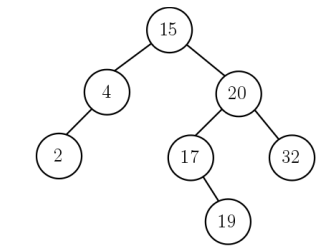

* `search(19)`를 하면...

> 1. root node의 값보다 크니까 오른쪽
> 2. 해당 노드의 값보단 작으니까 왼쪽
> 3. 해당 노드의 값보다 크니까 왼쪽 -> 도착!

* `search(5)`를 하면...

> 1. root node의 값보다 작으니까 왼쪽
> 2. 해당 노드의 값보다 큰데 오른쪽에 노드가 비어있으므로 트리에 존재하지 않음 -> None


> 탐색에 트리의 최대 높이만큼의 시간이 걸림 -> $O(h)$(노드가 꽉 차있을 경우 $O(\log n)$)

`-` 구현

In [ ]:
class BST :
    def __init__(self) :
        self.root = None
        self.size = 0
        
    def __len__(self) :
        return self.size
    
    def __str__(self) :
        return self.root
    
    def __iter__(self) :
        self.root.__iter__()
    
    def __next__(self) :
        ## 이거 안되긴 할텐데, 잘 몰루?
        self.root.__next__()
        
    def find_loc(self, key) :
        ## key 값 노드가 있다면 해당 노드 리턴
        ## 없다면 노드가 삽입될 부모 노드 리턴 : 왜?
        if self.size == 0 :
            return None
        
        p = None
        v = self.root
        
        while v != None :    
            if k == v.key :
                return v ## 있다면 해당 노드 리턴
            elif k > v.key :
                p = v
                v = v.right
                v.find_loc(k)
            else :
                p = v
                v = v.left
                v.find_loc(k)
        
        return p ## 없다면 부모 노드 리턴
    
    def search(self, key) :
        n = self.find_loc(key)
        if n.key != key :
            return None
        else :
            return n
    
    def insert(self, key) :
        p = self.find_loc(key) ## 해당 노드가 없으면 부모 노드를 반환
        v = Node(key)
        
        if p == None :
            self.root = v
        elif p.key != key :
            v.parent = p
            
            if key < p.key :
                p.left = v
            else :
                p.right = v
                
            self.size += 1
            return v ## 새로 삽입된 노드를 반환
        
        else :
            print("Key is already in tree")
            return None ## 이미 있는 노드를 insert하려고 했음
        
    def deleteByMerging(self, x) :
        ## 노드 x를 삭제 -> 노드가 있다고 가정
        ## x 자리에 Left SubTree를 부착하고, Left SubTree의 가장 큰 원소(우측 끝) 아래에 Right SubTree를 부착
        ## m을 찾기 위해 사용되는 시간이 가장 많음 -> O(h)
        ## 그런데 이러면 depth가 너무 깊어지는 거 아닌가?
        a = x.left
        b = x.right
        p = x.parent
        c = None
        
        if a != None :
            c = a
            m = a
            while m.right != None :
                m = m.right
            
            if b != None :
                b.pareng = m
                m.right = b
        
        else :
            c = b ## b == None이면 None일 수 있음(x가 리프 노드인 경우)
        
        if p == None :
            ## x가 root node인 경우
            self.root = c
            if c != None :
                c.parent = None ## c가 존재하는 경우(자식 노드가 있는 경우 == 트리의 크기가 1이 아닌 경우)
                
        else :
            if c != None :
                c.parent = p
            elif p.key < c.key :
                p.right = c
            else :
                p.left = c
        
        self.size -= 0
        return None
    
    def deleteByCopying(self, x) :
        ## L에 들어있는 값 중에서 m을 copy해서 들여오는 것
        ## m의 Left SubTree를 m의 자리로 옮김 : m의 Right SubTree는 정의 상 존재할 수 없음
        ## m을 찾는데 사용되는 시간이 가장 많음 -> O(h)
        a = x.left
        b = x.right
        p = x.parent
        c = None
        
        if a != None :
            m = a
            
            while m.right != None :
                m = m.right
            
            c = m
        
        else :
            c = b
            
        if p == None :
            self.root = None
        
        elif c == None :
            if x.key > p.key :
                p.right = None
            else :
                p.left = None
        
        else :        
            if c.key > p.key :
                p.right = c
            else :
                p.left = c
                
        self.size -= 1
        return None

* `insert`, `search`(`find_loc`), `delete`(`merging`, `copying`) : $O(h)$
* `insert`, `delete`는 모두 `search`에 영향을 받음
> $h$가 얼마일지는 아직 모름 -> `insert`순서에 따라 같은 원소가 들어있더라도 level이 다를 수 있음
>
> BST의 level을 최대한 작게 유지하는 것이 좋음...